In [6]:
"""
This line install all dependencies from the repository docker-python
"""

!pip install https://github.com/kaggle/docker-python

  ERROR: Cannot unpack file C:\Users\samue\AppData\Local\Temp\pip-unpack-4mjugsvg\docker-python (downloaded from C:\Users\samue\AppData\Local\Temp\pip-req-build-jqr45d13, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of C:\Users\samue\AppData\Local\Temp\pip-req-build-jqr45d13


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!python -m pip install matplotlib==3.5.0
!python -m pip install seaborn==0.11.0

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [8]:
!pip install plotly

In [9]:
import numpy as np
import pandas as pd
import datetime
import random
import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV

In [10]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action = 'ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

In [13]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
train.shape, test.shape

((1460, 81), (1459, 80))

In [14]:
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

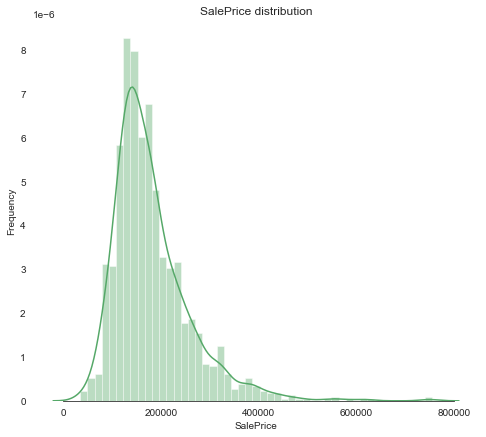

In [20]:
sns.set_style("white")
sns.set_color_codes(palette = 'deep')

f, ax = plt.subplots(figsize = (8, 7))
sns.distplot(train['SalePrice'], color = 'g');
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(title = "SalePrice distribution")

#Remove frame from figure
sns.despine(trim = True, left = True)

plt.show()

In [21]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


SalePice is Right Skewd

<a id = "section1"></a>
<h2>Detail of the numeric variables</h2>

In [22]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []

for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)
print('numeric variables', numeric)


numeric variables ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
-- numeric variables --



-- numeric variables --



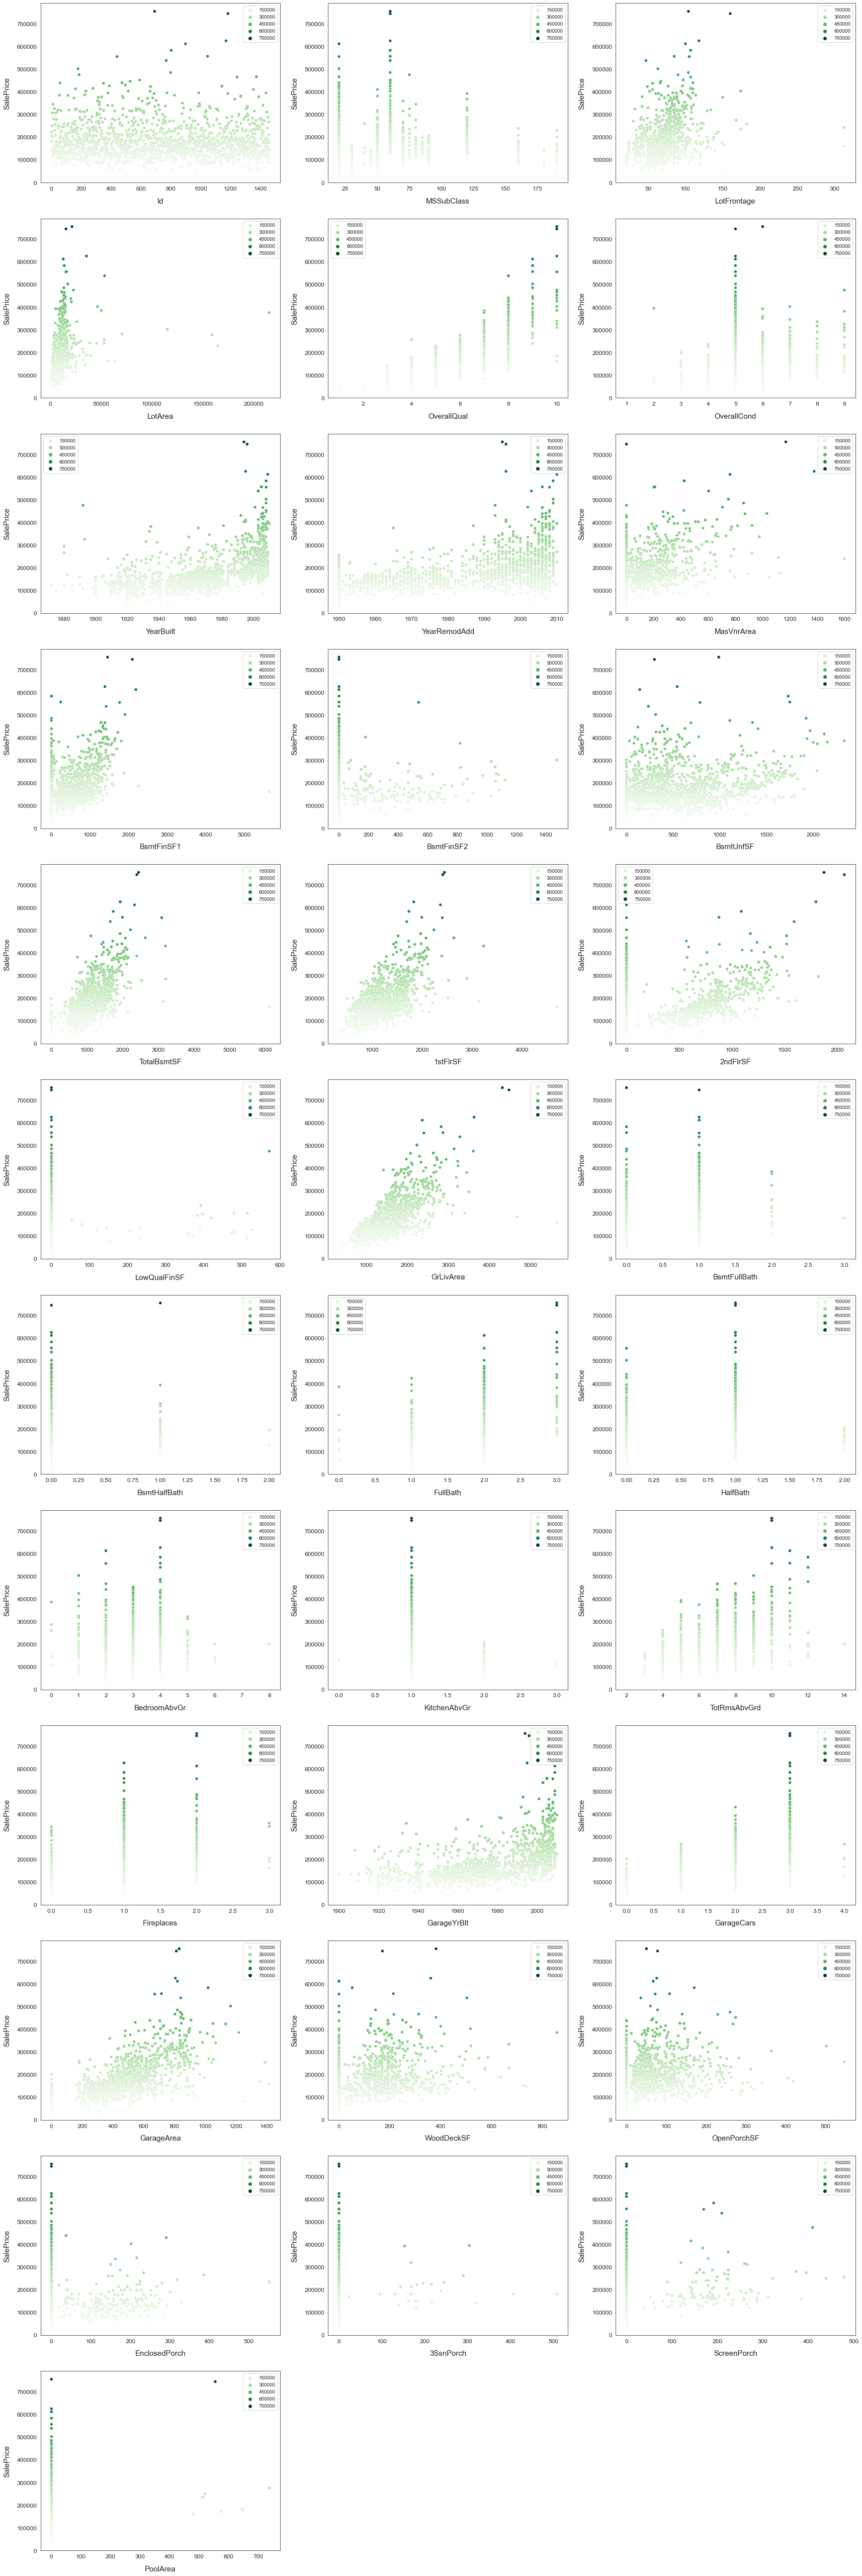

In [23]:
import sys

print('-- numeric variables --\n')

fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 120))
plt.subplots_adjust(right = 2)
plt.subplots_adjust(top = 2)
sns.color_palette("husl", 8)


for i, feature in enumerate(list(train[numeric]), 1):
    if feature == 'MiscVal':
        break
        
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Greens', data=train)
    
    plt.xlabel('{}'.format(feature), size = 15, labelpad = 12.5)
    plt.ylabel('SalePrice', size = 15, labelpad = 12.5)
    
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
        
    plt.legend(loc = 'best', prop = {'size' : 10})
    
plt.show()

If we enumerate the variances of the numerical variables as above, we can clearly check the variables that are correlated with the 'SalePrice' of Target variable.

<h2>the power of visualization</h2>

**Various Plot**

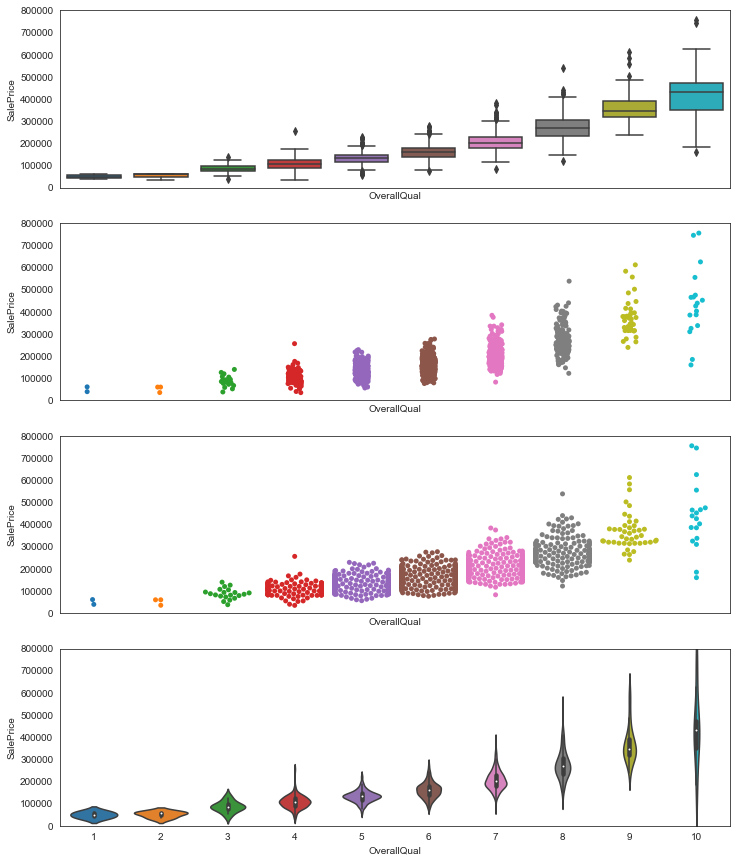

In [24]:
f, ax = plt.subplots(4, 1, figsize = (12, 15), sharex = True)

data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)

# Box Plot
fig1 = sns.boxplot(x = train['OverallQual'], y = "SalePrice", data = data, ax = ax[0])
fig1.axis(ymin = 0, ymax = 800000)

#Strip Plot
fig2 = sns.stripplot(x = train['OverallQual'], y = "SalePrice", data = data, ax = ax[1])
fig2.axis(ymin = 0, ymax = 800000)

# Swarm Plot
fig3 = sns.swarmplot(x = train['OverallQual'], y = "SalePrice", data = data, ax = ax[2])
fig3.axis(ymin = 0, ymax = 800000)

# Violin Plot
fig4 = sns.violinplot(x = train['OverallQual'], y = "SalePrice", data = data, ax = ax[3])
fig4.axis(ymin = 0, ymax = 800000);

**Various Plot of time series variables**

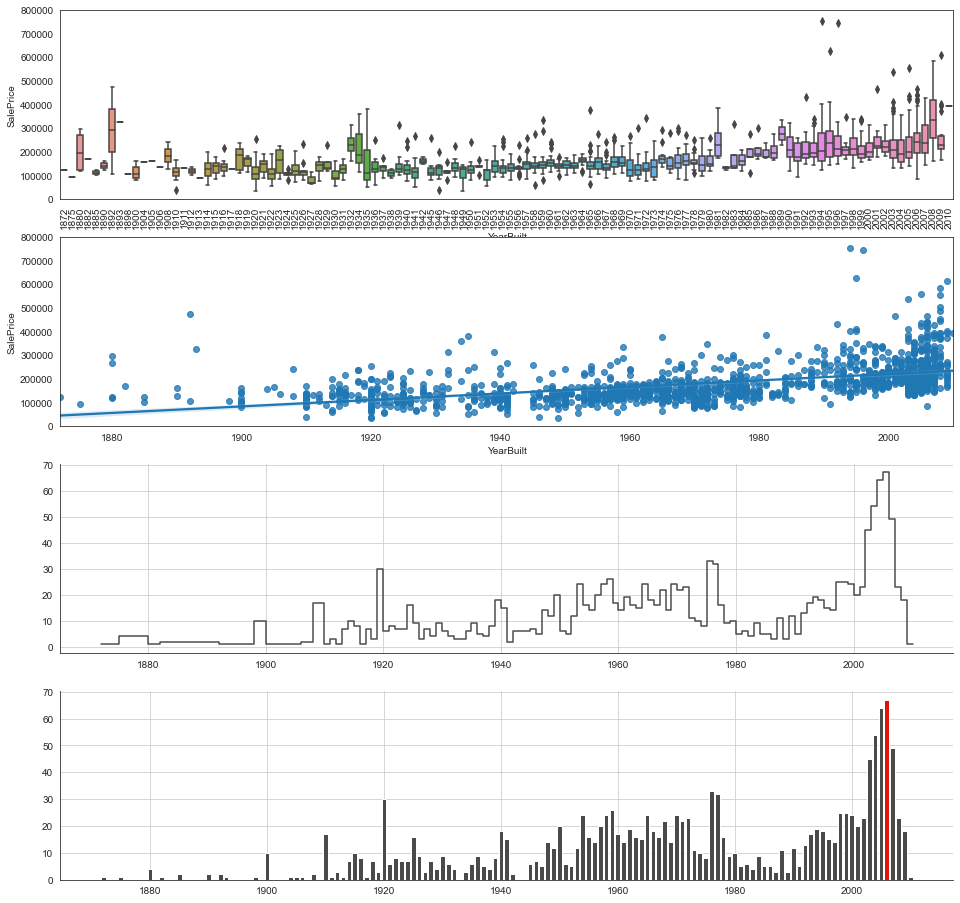

In [25]:
f, ax = plt.subplots(4, 1, figsize = (16, 16))

data = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)

fig1 = sns.boxplot(x = train['YearBuilt'], y = 'SalePrice', data = data, ax = ax[0])
fig1.axis(ymin = 0, ymax = 800000);
ax[0].xaxis.set_tick_params(rotation = 90);

fig2 = sns.regplot(x = train['YearBuilt'], y = "SalePrice", data = data, ax = ax[1])
fig2.axis(ymin = 0, ymax = 800000);
# ax[1].xaxis.set_tick_params(rotation = 90)

built = data['YearBuilt'].value_counts().sort_index()

ax[2].step(built.index, built, color = "#4a4a4a")
for s in ['top', 'right']:
    ax[2].spines[s].set_visible(False)
ax[2].grid()


color_ = ['#4a4a4a' if val != max(built) else "#e3120b" for val in built]
ax[3].bar(built.index, built, color = color_)

for s in ['top', 'right']:
    ax[3].spines[s].set_visible(False)
ax[3].grid()

You can draw multiple graphs for the same time period by doing the following.

In [26]:
train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

For clarity, we will restrict the amount of features.

In [27]:
train['__HouseStyle'] = train['HouseStyle'].apply(lambda x: 'ETC' if x in ['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'] else x)

In [28]:
train['__HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
ETC       135
Name: __HouseStyle, dtype: int64

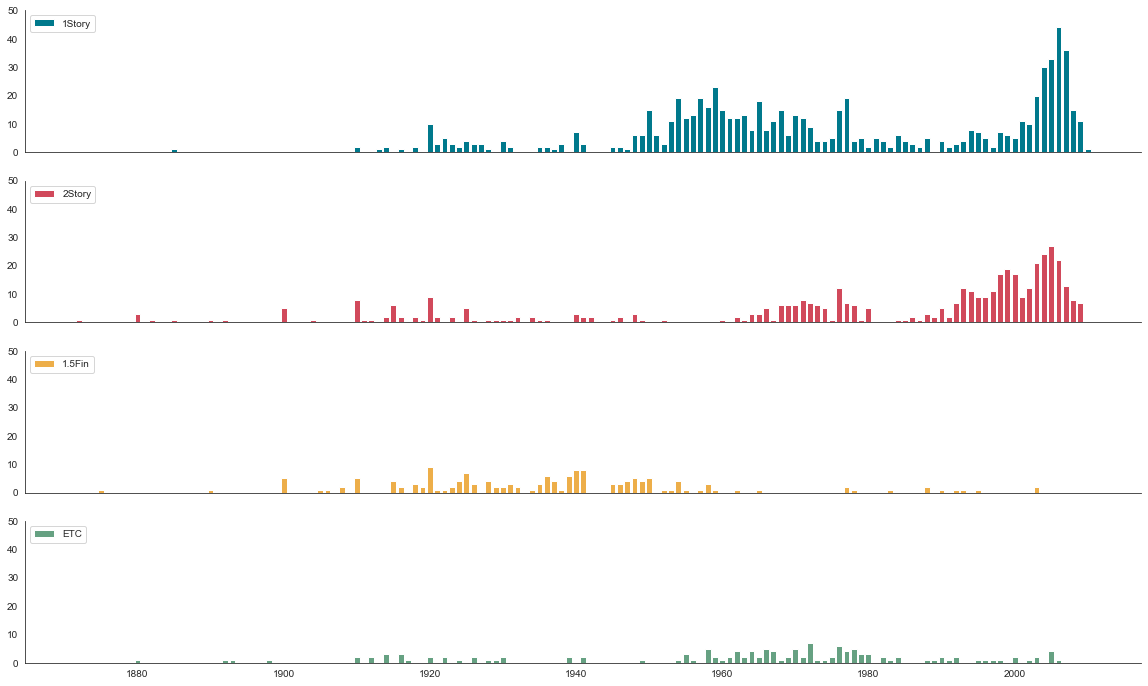

In [29]:
color_ = ["#00798c", '#d1495b', '#edae49', '#66a182']
fig, ax = plt.subplots(4, 1, figsize = (20, 12), sharex = True)

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts()
    ax[i].bar(hs_built.index, hs_built, color = color_[i], label = hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc = 'upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)

plt.show()

<h3>Overlapping in bar graph</h3>
In this case, multiple graphs is difficult for absolute comparison.<br>
By doing overlapping, we can compare multiple graphs easily!

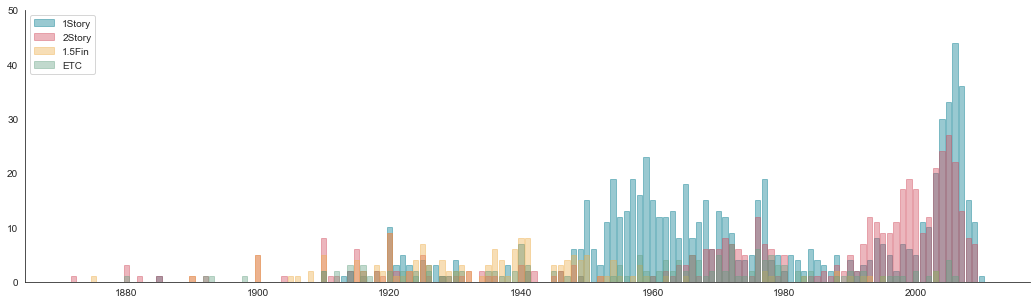

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts()
    ax.bar(hs_built.index, hs_built, color = color_[i], label = hs, alpha = 0.4, edgecolor = color_[i])

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)
ax.legend(loc = 'upper left')
plt.show()

<h3>Stack in bar graph</h3>

These values can be **stacked**.

In [31]:
#cumsum is Cumulative sum
data_sub = train.groupby('__HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC', '1.5Fin', '2Story', '1Story']].cumsum(axis = 0).T
data_sub

__HouseStyle  ETC  1.5Fin  2Story  1Story
YearBuilt                                
1872          0.0     0.0     1.0     1.0
1875          0.0     1.0     1.0     1.0
1880          1.0     1.0     4.0     4.0
1882          0.0     0.0     1.0     1.0
1885          0.0     0.0     1.0     2.0
1890          0.0     1.0     2.0     2.0
1892          1.0     1.0     2.0     2.0
1893          1.0     1.0     1.0     1.0
1898          1.0     1.0     1.0     1.0
1900          0.0     5.0    10.0    10.0
1904          0.0     0.0     1.0     1.0
1905          0.0     1.0     1.0     1.0
1906          0.0     1.0     1.0     1.0
1908          0.0     2.0     2.0     2.0
1910          2.0     7.0    15.0    17.0
1911          0.0     0.0     1.0     1.0
1912          2.0     2.0     3.0     3.0
1913          0.0     0.0     0.0     1.0
1914          3.0     3.0     5.0     7.0
1915          0.0     4.0    10.0    10.0
1916          3.0     5.0     7.0     8.0
1917          1.0     1.0     1.0     1.0
1918          0.0     3.0     5.0     7.0
1919          0.0     2.0     3.0     3.0
1920          2.0    11.0    20.0    30.0
1921          0.0     1.0     3.0     6.0
1922          2.0     3.0     3.0     8.0
1923          0.0     2.0     4.0     7.0
1924          1.0     5.0     5.0     7.0
1925          0.0     7.0    12.0    16.0
1926          2.0     5.0     6.0     9.0
1927          0.0     0.0     0.0     3.0
1928          1.0     5.0     6.0     7.0
1929          1.0     3.0     4.0     4.0
1930          2.0     4.0     5.0     9.0
1931          0.0     3.0     4.0     6.0
1932          0.0     2.0     4.0     4.0
1934          0.0     1.0     3.0     3.0
1935          0.0     3.0     4.0     6.0
1936          0.0     6.0     7.0     9.0
1937          0.0     4.0     4.0     5.0
1938          0.0     1.0     1.0     4.0
1939          2.0     8.0     8.0     8.0
1940          0.0     8.0    11.0    18.0
1941          2.0    10.0    12.0    15.0
1942          0.0     0.0     2.0     2.0
1945          0.0     3.0     4.0     6.0
1946          0.0     3.0     5.0     7.0
1947          0.0     4.0     4.0     5.0
1948          0.0     5.0     8.0    14.0
1949          1.0     5.0     6.0    12.0
1950          0.0     5.0     5.0    20.0
1951          0.0     0.0     0.0     6.0
1952          0.0     1.0     2.0     5.0
1953          0.0     1.0     1.0    12.0
1954          1.0     5.0     5.0    24.0
1955          3.0     4.0     4.0    16.0
1956          1.0     1.0     1.0    14.0
1957          0.0     1.0     1.0    20.0
1958          5.0     8.0     8.0    24.0
1959          2.0     3.0     3.0    26.0
1960          1.0     1.0     2.0    17.0
1961          2.0     2.0     2.0    14.0
1962          4.0     5.0     7.0    19.0
1963          2.0     2.0     3.0    16.0
1964          4.0     4.0     7.0    15.0
1965          2.0     3.0     6.0    24.0
1966          5.0     5.0    10.0    18.0
1967          4.0     4.0     5.0    16.0
1968          1.0     1.0     7.0    22.0
1969          2.0     2.0     8.0    14.0
1970          5.0     5.0    11.0    24.0
1971          2.0     2.0    10.0    22.0
1972          7.0     7.0    14.0    23.0
1973          1.0     1.0     7.0    11.0
1974          1.0     1.0     6.0    10.0
1975          2.0     2.0     3.0     8.0
1976          6.0     6.0    18.0    33.0
1977          4.0     6.0    13.0    32.0
1978          5.0     6.0    12.0    16.0
1979          3.0     3.0     4.0     9.0
1980          3.0     3.0     8.0    10.0
1981          0.0     0.0     0.0     5.0
1982          2.0     2.0     2.0     6.0
1983          1.0     2.0     2.0     4.0
1984          2.0     2.0     3.0     9.0
1985          0.0     0.0     1.0     5.0
1986          0.0     0.0     2.0     5.0
1987          0.0     0.0     1.0     3.0
1988          1.0     3.0     6.0    11.0
1989          1.0     1.0     3.0     3.0
1990          2.0     3.0     8.0    12.0
1991          1.0     1.0     3.0     5.0
1992      

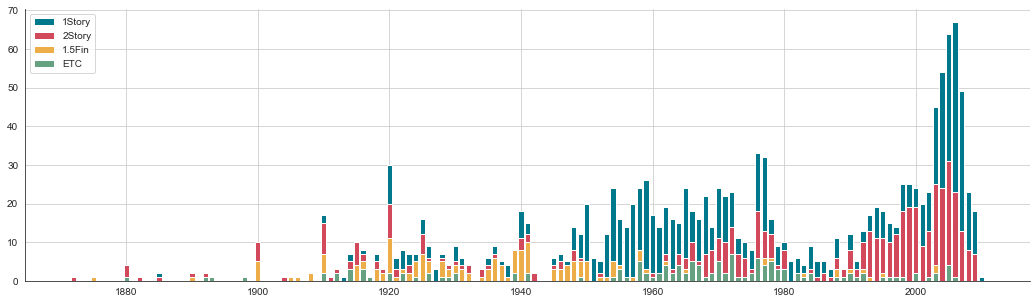

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color = color_[i], label = hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc = 'upper left')
ax.grid()
plt.show()

<h3>Ratio in bar graph</h3><br>

They are both easy to see! And you can even visualize the **ratios**

In [33]:
data_sub = train.groupby('__HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC', '1.5Fin', '2Story', '1Story']].T
data_sum = data_sub.sum(axis = 1)
data_sub = (data_sub.T / data_sum).cumsum().T#(4, 112), (112, )

In [34]:
data_sub

__HouseStyle       ETC    1.5Fin    2Story  1Story
YearBuilt                                         
1872          0.000000  0.000000  1.000000     1.0
1875          0.000000  1.000000  1.000000     1.0
1880          0.250000  0.250000  1.000000     1.0
1882          0.000000  0.000000  1.000000     1.0
1885          0.000000  0.000000  0.500000     1.0
1890          0.000000  0.500000  1.000000     1.0
1892          0.500000  0.500000  1.000000     1.0
1893          1.000000  1.000000  1.000000     1.0
1898          1.000000  1.000000  1.000000     1.0
1900          0.000000  0.500000  1.000000     1.0
1904          0.000000  0.000000  1.000000     1.0
1905          0.000000  1.000000  1.000000     1.0
1906          0.000000  1.000000  1.000000     1.0
1908          0.000000  1.000000  1.000000     1.0
1910          0.117647  0.411765  0.882353     1.0
1911          0.000000  0.000000  1.000000     1.0
1912          0.666667  0.666667  1.000000     1.0
1913          0.000000  0.000000  0.000000     1.0
1914          0.428571  0.428571  0.714286     1.0
1915          0.000000  0.400000  1.000000     1.0
1916          0.375000  0.625000  0.875000     1.0
1917          1.000000  1.000000  1.000000     1.0
1918          0.000000  0.428571  0.714286     1.0
1919          0.000000  0.666667  1.000000     1.0
1920          0.066667  0.366667  0.666667     1.0
1921          0.000000  0.166667  0.500000     1.0
1922          0.250000  0.375000  0.375000     1.0
1923          0.000000  0.285714  0.571429     1.0
1924          0.142857  0.714286  0.714286     1.0
1925          0.000000  0.437500  0.750000     1.0
1926          0.222222  0.555556  0.666667     1.0
1927          0.000000  0.000000  0.000000     1.0
1928          0.142857  0.714286  0.857143     1.0
1929          0.250000  0.750000  1.000000     1.0
1930          0.222222  0.444444  0.555556     1.0
1931          0.000000  0.500000  0.666667     1.0
1932          0.000000  0.500000  1.000000     1.0
1934          0.000000  0.333333  1.000000     1.0
1935          0.000000  0.500000  0.666667     1.0
1936          0.000000  0.666667  0.777778     1.0
1937          0.000000  0.800000  0.800000     1.0
1938          0.000000  0.250000  0.250000     1.0
1939          0.250000  1.000000  1.000000     1.0
1940          0.000000  0.444444  0.611111     1.0
1941          0.133333  0.666667  0.800000     1.0
1942          0.000000  0.000000  1.000000     1.0
1945          0.000000  0.500000  0.666667     1.0
1946          0.000000  0.428571  0.714286     1.0
1947          0.000000  0.800000  0.800000     1.0
1948          0.000000  0.357143  0.571429     1.0
1949          0.083333  0.416667  0.500000     1.0
1950          0.000000  0.250000  0.250000     1.0
1951          0.000000  0.000000  0.000000     1.0
1952          0.000000  0.200000  0.400000     1.0
1953          0.000000  0.083333  0.083333     1.0
1954          0.041667  0.208333  0.208333     1.0
1955          0.187500  0.250000  0.250000     1.0
1956          0.071429  0.071429  0.071429     1.0
1957          0.000000  0.050000  0.050000     1.0
1958          0.208333  0.333333  0.333333     1.0
1959          0.076923  0.115385  0.115385     1.0
1960          0.058824  0.058824  0.117647     1.0
1961          0.142857  0.142857  0.142857     1.0
1962          0.210526  0.263158  0.368421     1.0
1963          0.125000  0.125000  0.187500     1.0
1964          0.266667  0.266667  0.466667     1.0
1965          0.083333  0.125000  0.250000     1.0
1966          0.277778  0.277778  0.555556     1.0
1967          0.250000  0.250000  0.312500     1.0
1968          0.045455  0.045455  0.318182     1.0
1969          0.142857  0.142857  0.571429     1.0
1970          0.208333  0.208333  0.458333     1.0
1971          0.090909  0.090909  0.454545     1.0
1972          0.304348  0.304348  0.608696     1.0
1973          0.090909  0.090909  0.636364     1.0
1974          0.100000  0.100000  0.600000     1.0
1975          0.250000

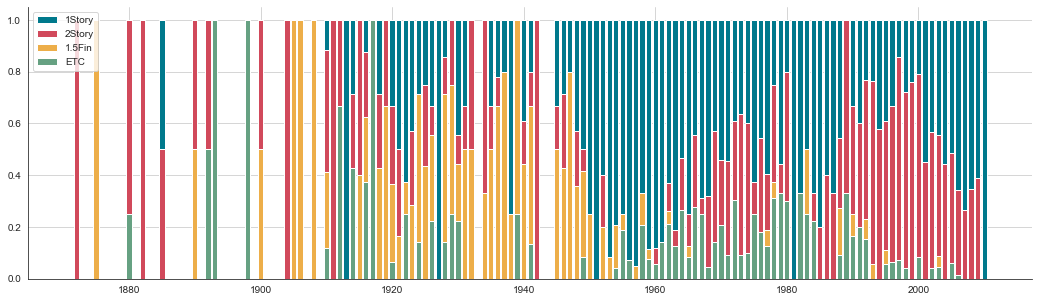

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color = color_[i], label = hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc = 'upper left')
ax.grid()
plt.show()

> **Line** graphs are better than bar graph for time series. 

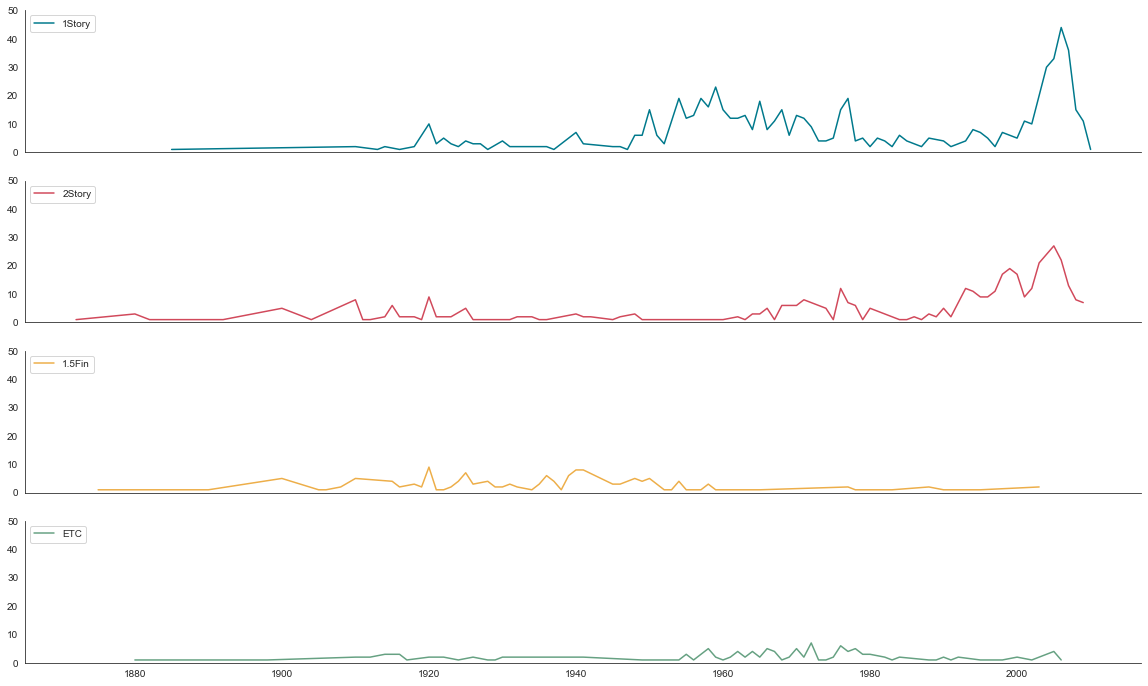

In [36]:
fig, ax = plt.subplots(4, 1, figsize = (20, 12), sharex = True)

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    ax[i].plot(hs_built.index, hs_built, color = color_[i], label = hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc = 'upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)
    
plt.show()

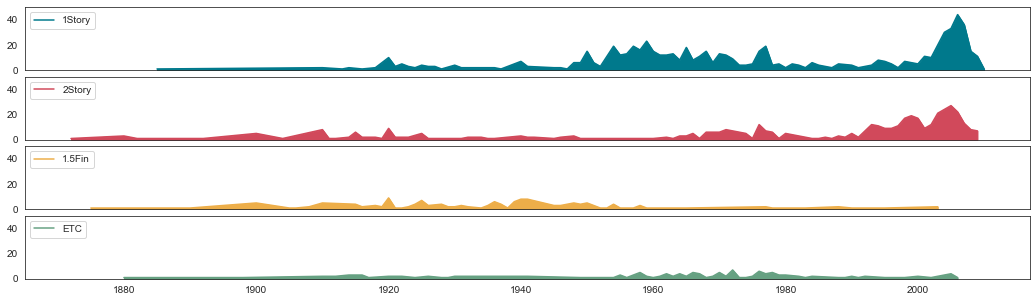

In [37]:
fig, ax = plt.subplots(4, 1, figsize = (18, 5), sharex = True)

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    ax[i].plot(hs_built.index, hs_built, color = color_[i], label = hs)
    ax[i].fill_between(hs_built.index, 0, hs_built, color = color_[i])
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc = 'upper left')

plt.subplots_adjust(hspace = 0.1)
plt.show()

<h3>Overlapping in line graph</h3>

As with bar, it is easier to plot them in the same place for comparison.

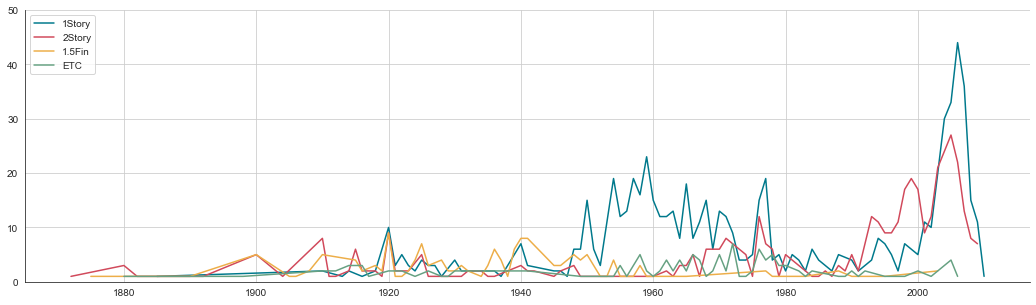

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color = color_[i], label = hs)

ax.set_ylim(0, 50)
ax.legend(loc = 'upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.grid()
plt.show()

You can change <b>linestyle</b>!

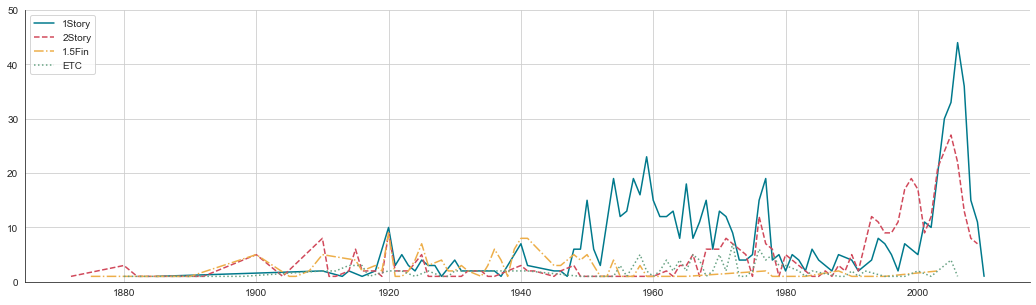

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))
linestyles = ['-', '--', '-.', ':']

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color = color_[i], linestyle = linestyles[i], label = hs)
    
ax.set_ylim(0, 50)
ax.legend(loc = 'upper left')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()#表中の格子
plt.show()

visualize the **overlapped area**

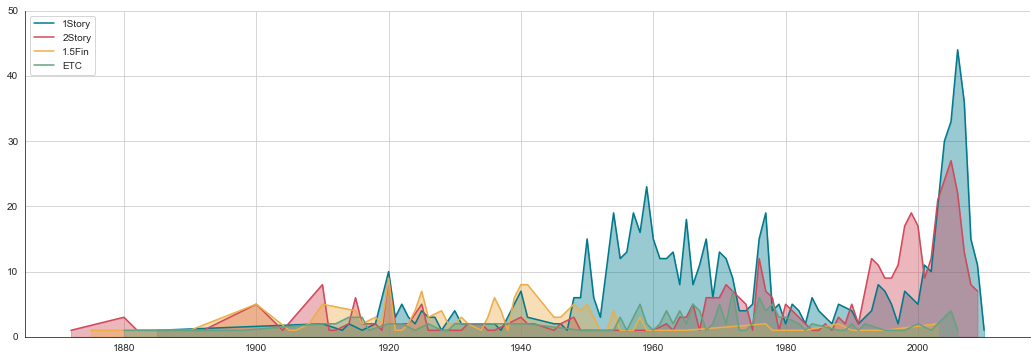

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (18, 6))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = train[train['__HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color = color_[i], label = hs)
    ax.fill_between(hs_built.index, 0, hs_built, color = color_[i], alpha = 0.4)
    
ax.set_ylim(0, 50)
ax.legend(loc = 'upper left')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.grid()

plt.show()

<h3>Stacking in line graph</h3>

Line graphs can be compared in the same way by **stacking**!

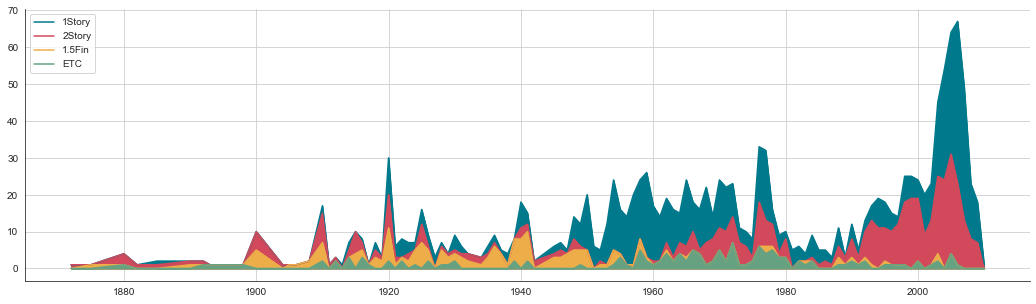

In [41]:
#unstack(): Series ←→ DataFrame
data_sub = train.groupby('__HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC', '1.5Fin', '2Story', '1Story']].cumsum().T

fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.plot(hs_built.index, hs_built, color = color_[i], label = hs)
    ax.fill_between(hs_built.index, 0, hs_built, color = color_[i])
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc = 'upper left')
ax.grid()
plt.show()

<h3>Stream graph in line graph</h3>

A streamgraph, or stream graph, is a type of stacked area graph which is displaced around a central axis, resulting in a flowing, organic shape.

In [42]:
data_sub = train.groupby('__HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum().T
data_sub.insert(0, "base", np.zeros(len(data_sub)))
data_sub = data_sub.add(-train['YearBuilt'].value_counts() / 2, axis = 0)

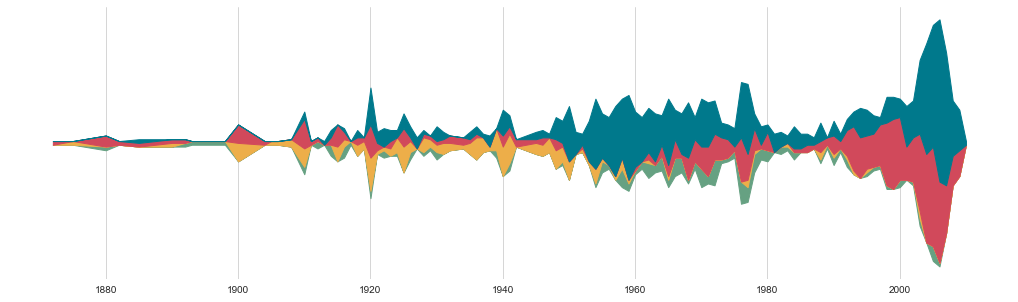

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (18, 5))
_color = color_[::-1]#reverse
hs_list = data_sub.columns

for i, hs in enumerate(hs_list):
    if i == 0: continue

    ax.fill_between(data_sub.index, data_sub.iloc[:, i-1], data_sub.iloc[:, i], color = _color[i-1])

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
    
ax.set_yticks([])
ax.grid()
plt.show()

<h3>Ratio in line graph</h3>

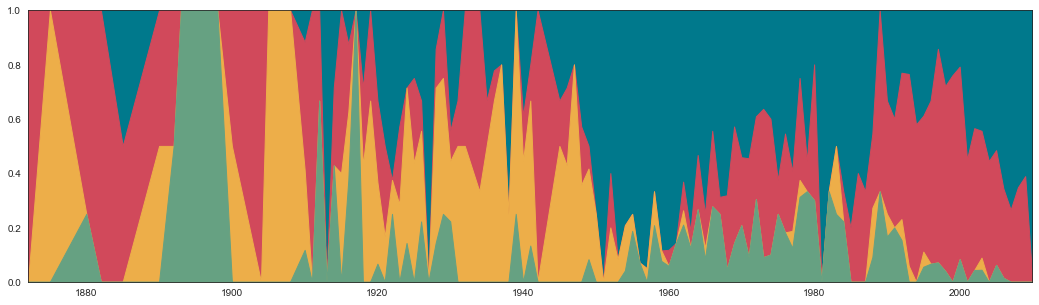

In [44]:
# sns.set_style('white')

data_sub = train.groupby('__HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].T
data_sum = data_sub.sum(axis = 1)
data_sub = (data_sub.T / data_sum).cumsum().T

fig, ax = plt.subplots(1, 1, figsize = (18, 5))

for i, hs in enumerate(train['__HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.fill_between(hs_built.index, 0, hs_built, color = color_[i])
    
ax.grid()
ax.set_ylim(0, 1)
ax.set_xlim(1872, 2010)
plt.show()

<h2>Variances of correlated variables with target variable</h2>

Let's look at <a href = "#section1">Detail of the numeric variables</a> and check the variance of the variables that are strongly correlated with target variable.

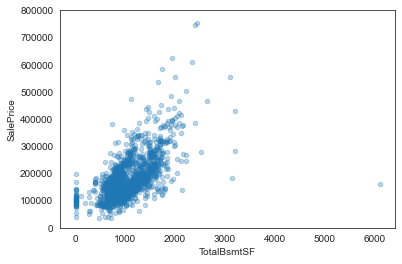

In [45]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', alpha = 0.3, ylim = (0, 800000));

By using **plotly**, we can check details from figure.<by>Hover the cursor over the figure. You will be able to see it, right?

In [46]:
data = pd.concat([train['SalePrice'], train['LotArea']], axis = 1)
fig = px.scatter(data, x = "LotArea", y = "SalePrice", trendline = "ols")
fig.show();

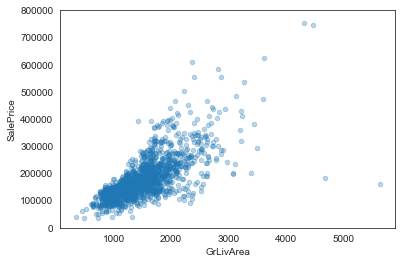

In [47]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', alpha = 0.3, ylim = (0, 800000));

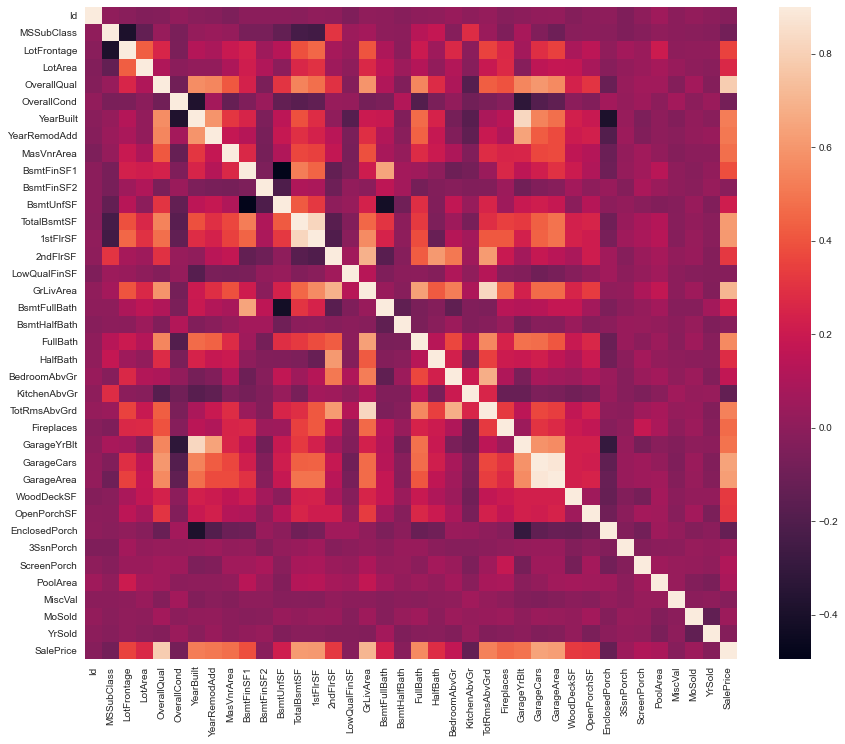

In [48]:
corr = train.corr()
plt.subplots(figsize = (15, 12))
sns.heatmap(corr, vmax = 0.9, square = True);

This makes it hard to see, doesn't it?

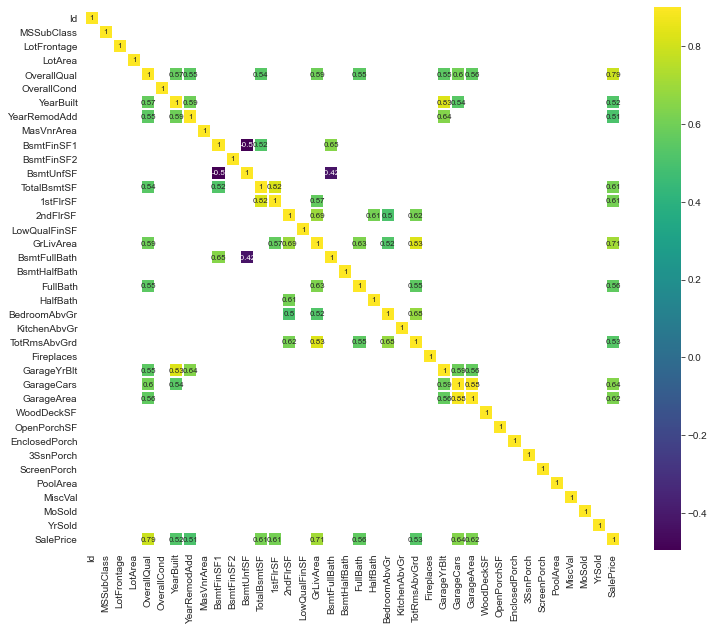

In [49]:
plt.figure(figsize = (12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap = 'viridis', vmax = 0.9, linewidth = 0.1, annot = True, annot_kws = {'size': 8}, square = True);

There is another way to focus only on the more useful features. In this notebook, we will take a look at this one.

top 10 relative variables 
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
-- top 10 relative variables-- 



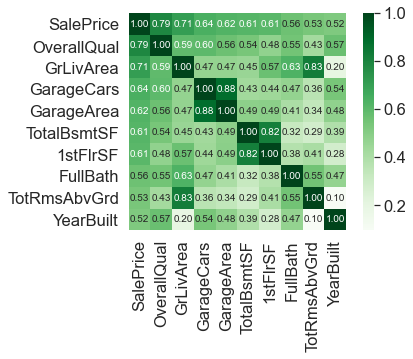

In [50]:
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index #class 'pandas.core.indexes.base.Index'
print('top 10 relative variables \n', train[cols].columns)
print('-- top 10 relative variables-- \n')
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cmap = 'Greens', annot = True, cbar = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)

**OverallQual** was found to be very correlated with SalePrice.<br> Of the variables that are strongly correlated with SalePrice, GarageCars and GarageArea are **similar**. Therefore, **GarageCars**, which has a stronger correlation, is retained.<br>TotalBsmtSF and 1stFloor are also similar. Therefore, we leave **TotalBsmtSF**, which has a stronger correlation.<br>TotRmsAbvGrd and GrLivArea are also similar. Therefore, we leave **GrLivArea**.

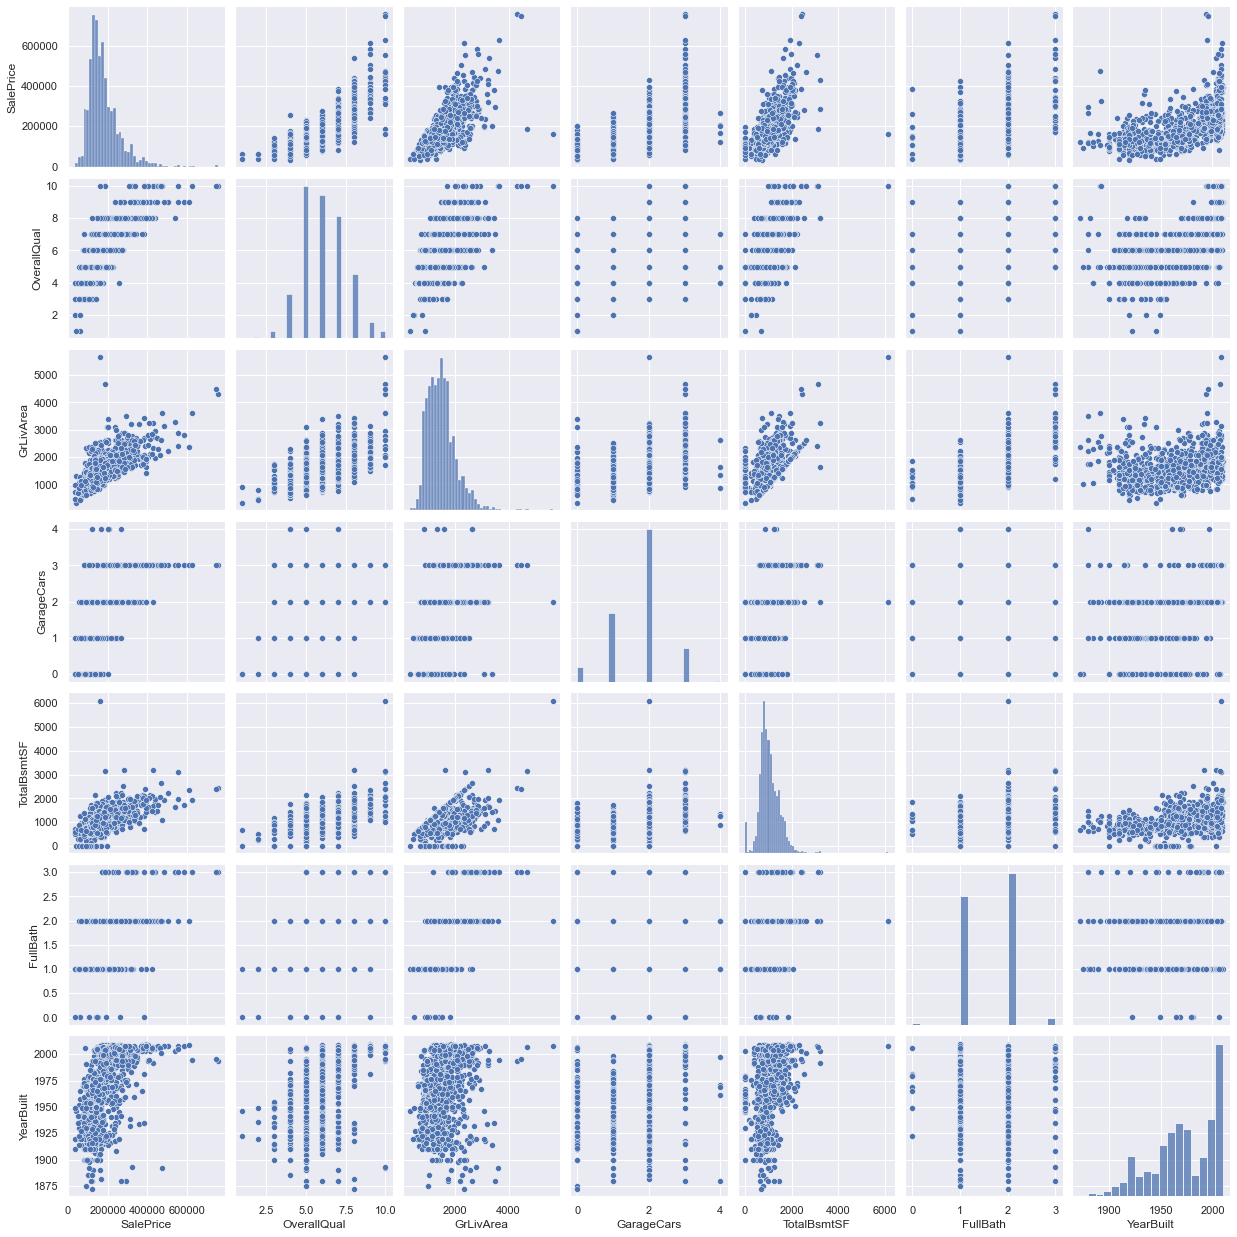

In [51]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [52]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageQual       81  0.055479
GarageFinish     81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

In [58]:
df_train = train.drop(missing[missing['Total'] > 1].index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
print(df_train.isnull().sum().max())

0


In [54]:
print(len(df_train.columns))
df_train.head(10)

64


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   
5   6          50       RL    14115   Pave      IR1         Lvl    AllPub   
6   7          20       RL    10084   Pave      Reg         Lvl    AllPub   
7   8          60       RL    10382   Pave      IR1         Lvl    AllPub   
8   9          50       RM     6120   Pave      Reg         Lvl    AllPub   
9  10         190       RL     7420   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
5    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
6    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story   
7    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
9    Corner       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   
5            5            5       1993          1995     Gable  CompShg   
6            8            5       2004          2005     Gable  CompShg   
7            7            6       1973          1973     Gable  CompShg   
8            7            5       1931          1950     Gable  CompShg   
9            5            6       1939          1950     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation  BsmtFinSF1  \
0     VinylSd     VinylSd        Gd        TA      PConc         706   
1     MetalSd     MetalSd        TA        TA     CBlock         978   
2     VinylSd     VinylSd        Gd        TA      PConc         486   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil         216   
4     VinylSd     VinylSd        Gd        TA      PConc         655   
5     VinylSd     VinylSd        TA        TA       Wood         732   
6     VinylSd     VinylSd        Gd        TA      PConc        1369   
7     HdBoard     HdBoard        TA        TA     CBlock         859   
8     BrkFace     Wd Shng        TA        TA     BrkTil           0   
9     MetalSd     MetalSd        TA        TA     BrkTil         851   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   
1           0        284         1262    GasA        Ex          Y      SBrkr   
2           0        434          920    GasA        Ex          Y      SBrkr   
3           0        540          756    GasA        Gd          Y      SBrkr   
4           0        490         1145    GasA        Ex          Y      SBrkr   
5           0         64          796    GasA        Ex          Y      SBrkr   
6           0        317         1686    GasA        Ex          Y      SBrkr   
7      

In [59]:
print(np.newaxis)

None


In [56]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('low\n')
print(low_range)
print('\n')
print('high\n')
print(high_range)

low

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


high

[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


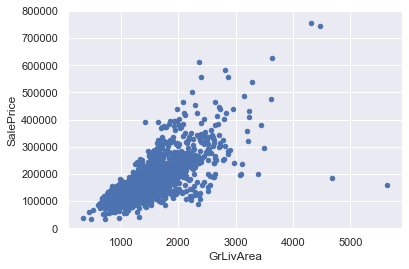

In [57]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

In [60]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


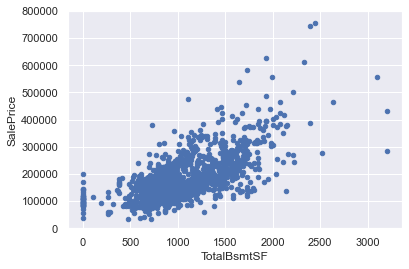

In [61]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

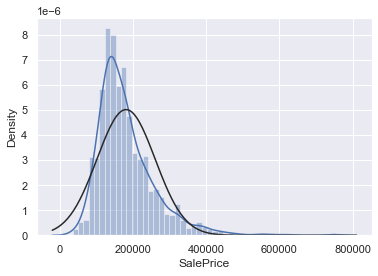

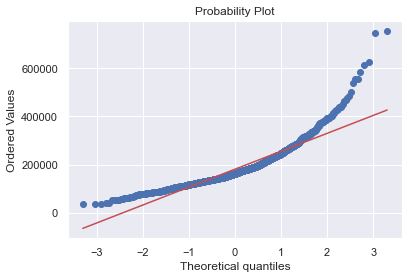

In [62]:
sns.distplot(df_train['SalePrice'], fit = norm);
# mu, sigma = norm.fit(df_train['SalePrice'])
# print(mu, sigma)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

The ML model doesn't work well with non-normally scattered data.<br>Therefore, we apply *log(1 + x)* function to solve the problem.

In [63]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

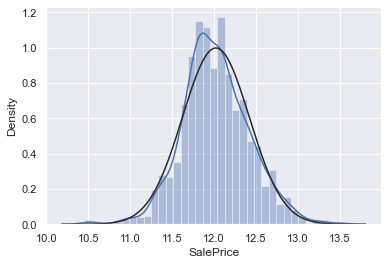

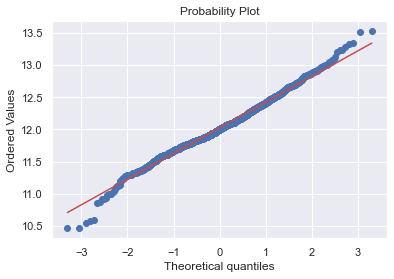

In [64]:
sns.distplot(df_train["SalePrice"], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot = plt)

Compare with above figure, there is appropriate normality by adopting log function.<br>Let's check at some other variables!

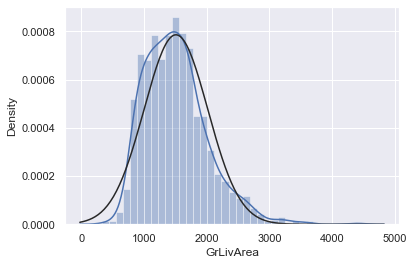

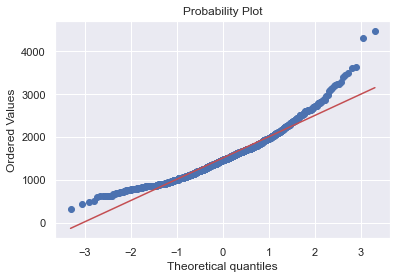

In [65]:
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [66]:
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])

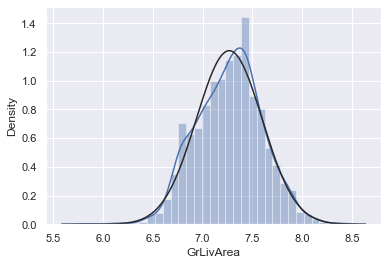

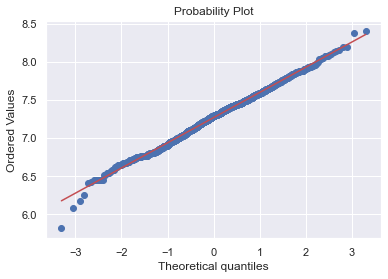

In [67]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

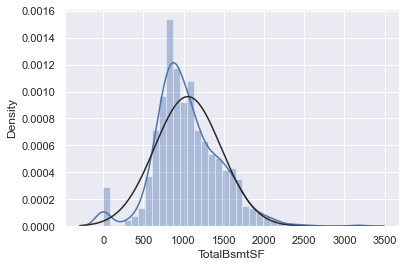

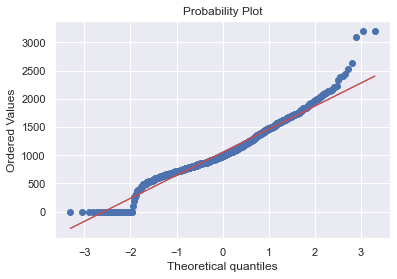

In [68]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

There is a problem. The value zero doesn't allow us to do log transformations.<br>Therefore, we process the data like following.

In [69]:
# df_train['TotalBsmtSF'] = np.log1p()
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [70]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])

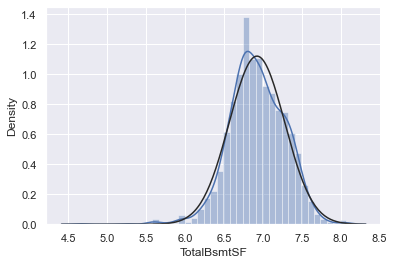

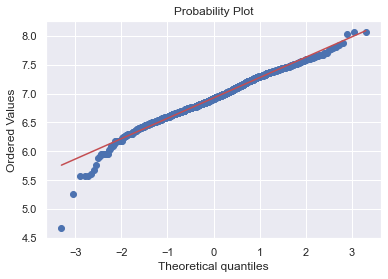

In [71]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

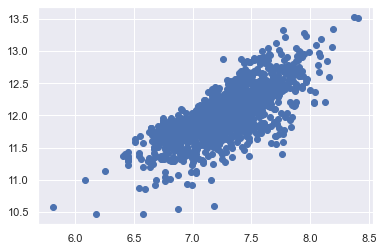

In [72]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Compared to the bivariate scatter plot before the log transformation, it has a nice shape without a cone. <br>***This is the power of normality!***

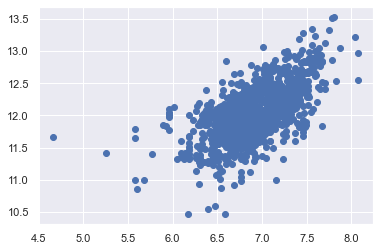

In [73]:
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice']);

<h2>Thank you !!!!!</h2>

If you find this notebook useful, please **upvote**!<br>
And if you have any questions, please ask on the **comments**!

<h2>Other work</h2>

* [Over 0.8!】Titanic_more_technical_EDA(ENG&JPN)](https://www.kaggle.com/fightingmuscle/over-0-8-titanic-more-technical-eda-eng-jpn)
<br>This is my notebook.If you read this notebook, you can learn data-science **from scratch**!<br>
* [EDA more technical🔥](https://www.kaggle.com/fightingmuscle/eda-more-technical)<br> This notebook can score 0.12 on House-Price problem with <b>detail explanation</b>.

* [How did I get the silver medal?(0.717)【Infer】](https://www.kaggle.com/fightingmuscle/how-did-i-get-the-silver-medal-0-717-infer/comments)

> I got silver medal for the first time! I published my inference code and trained models. My training code will be available soon, please wait. 